In [264]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import LabelEncoder


In [265]:
df = pd.read_excel('drug_consumption.xls')

In [266]:
df.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Shrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [267]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 32 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1885 non-null   int64  
 1   Age        1885 non-null   float64
 2   Gender     1885 non-null   float64
 3   Education  1885 non-null   float64
 4   Country    1885 non-null   float64
 5   Ethnicity  1885 non-null   float64
 6   Nscore     1885 non-null   float64
 7   Escore     1885 non-null   float64
 8   Oscore     1885 non-null   float64
 9   Ascore     1885 non-null   float64
 10  Cscore     1885 non-null   float64
 11  Impulsive  1885 non-null   float64
 12  SS         1885 non-null   float64
 13  Alcohol    1885 non-null   object 
 14  Amphet     1885 non-null   object 
 15  Amyl       1885 non-null   object 
 16  Benzos     1885 non-null   object 
 17  Caff       1885 non-null   object 
 18  Cannabis   1885 non-null   object 
 19  Choc       1885 non-null   object 
 20  Coke    

In [268]:
df.nunique()

ID           1885
Age             6
Gender          2
Education       9
Country         7
Ethnicity       7
Nscore         49
Escore         42
Oscore         35
Ascore         41
Cscore         41
Impulsive      10
SS             11
Alcohol         7
Amphet          7
Amyl            7
Benzos          7
Caff            7
Cannabis        7
Choc            7
Coke            7
Crack           7
Ecstasy         7
Heroin          7
Ketamine        7
Legalh          7
LSD             7
Meth            7
Shrooms         7
Nicotine        7
Semer           5
VSA             7
dtype: int64

In [269]:
df.columns


Index(['ID', 'Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore',
       'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS', 'Alcohol',
       'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack',
       'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Shrooms',
       'Nicotine', 'Semer', 'VSA'],
      dtype='object')

In [270]:
personality = ['Age', 'Nscore', 'Escore', 'Oscore'
               , 'Ascore', 'Cscore', 'Impulsive', 'SS']
drugs = ['Amphet', 'Amyl', 'Benzos', 'Cannabis'
         , 'Coke', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine'
         , 'Legalh', 'LSD', 'Meth', 'Shrooms'
         , 'Semer', 'VSA']
drugs_legal = ['Alcohol', 'Caff', 'Choc', 'Nicotine']

pair = df[personality]
sns.pairplot(pair, kind="reg")

In [271]:
# All credit to: https://github.com/dformoso/sklearn-classification/blob/master/Data%20Science%20Workbook%20-%20Census%20Income%20Dataset.ipynb
# Let’s plot the distribution of each feature
def plot_distribution(dataset, cols=4, width=20, height=25, hspace=0.5, wspace=0.2):
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if dataset.dtypes[column] == np.object:
            g = sns.countplot(y=column, data=dataset)
            substrings = [s.get_text()[:18] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            plt.xlim([0, 1900])
            plt.xticks(rotation=25)
        else:
            g = sns.distplot(dataset[column])
            plt.xlim([-4, 4])
            plt.xticks(rotation=25)

In [272]:
df.Ethnicity.unique()

array([ 0.126  , -0.31685,  0.1144 , -0.22166, -0.50212, -1.10702,
        1.90725])

In [273]:
df2 = df.copy()
lab_enc = LabelEncoder()
for col in drugs+drugs_legal:
    df2[col] = lab_enc.fit_transform(df2[col])
    # print(lab_enc.classes_)

In [274]:
df2 = df2[['Ethnicity', 'Age', 'Gender', 'Education', 'Country']].astype(np.object)\
    .join(df2.drop(columns=['Ethnicity', 'Age', 'Gender', 'Education', 'Country', 'ID']))

In [275]:
df2[drugs+drugs_legal] = df2[drugs+drugs_legal].astype(np.object)

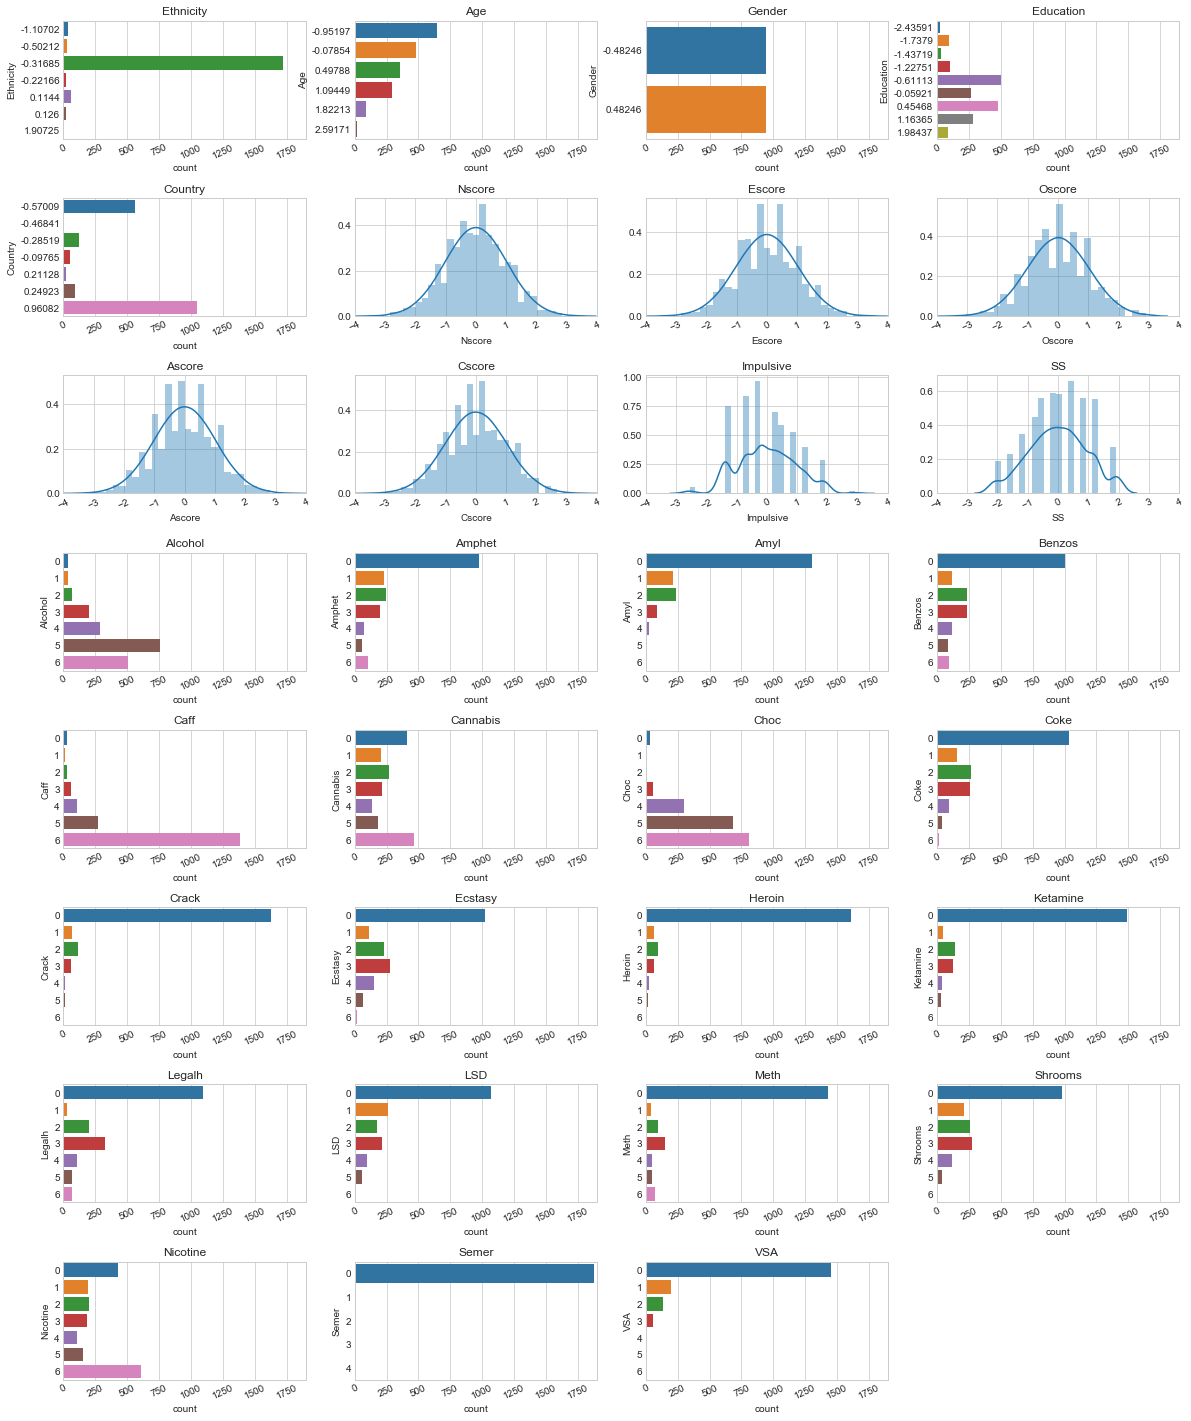

In [276]:
plot_distribution(df2)

## Correlation-plot for collinearity of drug use

### Visualizing collinearity of drugs

In [277]:
df.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Shrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [278]:
df2[drugs+drugs_legal] = df2[drugs+drugs_legal].astype(np.int8)

In [279]:
corr = df2[drugs].corr()

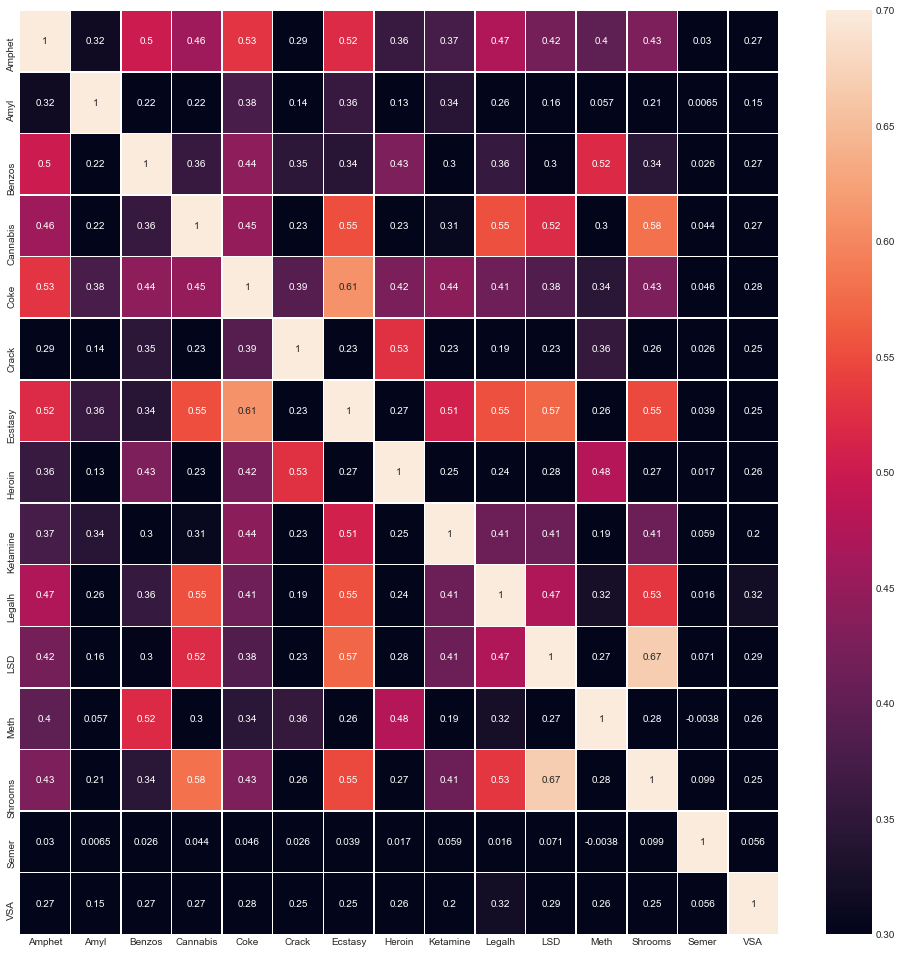

In [280]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(17, 17))
    ax = sns.heatmap(corr, annot=True, linewidths=.5, vmin=0.3, vmax=0.7)

In [281]:
corr[corr > 0.4].sum().sort_values()

Amyl        1.000000
Semer       1.000000
VSA         1.000000
Crack       1.527120
Meth        1.997557
Heroin      2.856761
Benzos      2.890205
Ketamine    3.180829
LSD         4.062111
Cannabis    4.115360
Amphet      4.334290
Legalh      4.410762
Shrooms     4.592536
Coke        4.739049
Ecstasy     4.866242
dtype: float64

In [284]:
corr[corr > 0.4].Ecstasy

Amphet      0.521537
Amyl             NaN
Benzos           NaN
Cannabis    0.552978
Coke        0.610783
Crack            NaN
Ecstasy     1.000000
Heroin           NaN
Ketamine    0.508329
Legalh      0.554134
LSD         0.570946
Meth             NaN
Shrooms     0.547536
Semer            NaN
VSA              NaN
Name: Ecstasy, dtype: float64

In [285]:
group_ecstasy = ['Amphet', 'Cannabis', 'Coke', 'ecstasy'
                 , 'Ketamine', 'Legalh', 'LSD', 'Shrooms']

In [286]:
corr[corr > 0.4].Benzos

Amphet      0.500642
Amyl             NaN
Benzos      1.000000
Cannabis         NaN
Coke        0.443109
Crack            NaN
Ecstasy          NaN
Heroin      0.427162
Ketamine         NaN
Legalh           NaN
LSD              NaN
Meth        0.519292
Shrooms          NaN
Semer            NaN
VSA              NaN
Name: Benzos, dtype: float64

In [296]:
group_benzos = ['Amphet', 'Coke', 'Benzos', 'Heroin', 'Meth']

In [297]:
corr[corr > 0.4].Crack

Amphet          NaN
Amyl            NaN
Benzos          NaN
Cannabis        NaN
Coke            NaN
Crack       1.00000
Ecstasy         NaN
Heroin      0.52712
Ketamine        NaN
Legalh          NaN
LSD             NaN
Meth            NaN
Shrooms         NaN
Semer           NaN
VSA             NaN
Name: Crack, dtype: float64

In [298]:
group_crack = ['Crack', 'Heroin']

### Creating target-groups

By looking at the correlation heatmap we define drug-clusters of correlating drugs. The metric as the measure of collinearity is the correlation-coefficient.
The drugs with the highest number of correlating targets is

| **type** |  **definition**                                              | **col_name**| **value**  |
|:----------:|:-------------------------------------------------------------|------------|---|
| non-user | never, over a decade ago, last decade                        | year_user  | 0 |
| user     | last year, last month, last week, last day                   | year_user  | 1 |
| non-user | never, over a decade ago, last decade, last year             | month_user | 0 |
| user     | last month, last week, last day                              | month_user | 1 |

#### Data format of target variables
+ 0: Never Used
+ 1: Used over a Decade Ago
+ 2: Used in Last Decade
+ 3: Used in Last Year
+ 4: Used in Last Month
+ 5: Used in Last Week
+ 6: Used in Last Day

In [305]:
for t, name_t in zip([3, 4], ['yearly', 'monthly']): # t is the relevant time threshold for separating the user/non-user groups
    for group, name_group in zip([group_ecstasy, group_benzos, group_crack], ['ecstasy', 'benzos', 'crack']):
        name = name_t + '_user_' + name_group
        mask = (df2[group] >= t).any(axis=1)
        df2[name] = mask.astype(np.int)

In [306]:
df2.head()

,Ethnicity,Age,Gender,Education,Country,Nscore,Escore,Oscore,Ascore,Cscore,...,Shrooms,Nicotine,Semer,VSA,yearly_user_ecstasy,yearly_user_benzos,yearly_user_crack,monthly_user_ecstasy,monthly_user_benzos,monthly_user_crack
0,0.126,0.49788,0.48246,-0.05921,0.96082,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,0,2,0,0,0,0,0,0,0,0
1,-0.31685,-0.07854,-0.48246,1.98437,0.96082,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,0,4,0,0,1,1,0,1,0,0
2,-0.31685,0.49788,-0.48246,-0.05921,0.96082,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,1,0,0,0,1,0,0,0,0,0
3,-0.31685,-0.95197,0.48246,1.16365,0.96082,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,0,2,0,0,0,1,0,0,0,0
4,-0.31685,0.49788,0.48246,1.98437,0.96082,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,2,2,0,0,1,0,0,0,0,0


In [289]:
df2['year_user_ecstasy'] = [1 if any(df2[group_ecstasy] >= 3) else 0]

#year_user_ecstasy


ValueError: Length of values does not match length of index

# Data Cleaning

Note: Consider dropping Ethnicity and/or Ethnicity "non-white"

In [ ]:
drugs_dropped = ['Amyl', 'Semer', 'VSA']

In [ ]:
to_be_dropped = ['ID']

In [ ]:
# drop those
df2.Semer.value_counts()

## Consider grouping education features